In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing libraries

In [2]:
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


get_ipython().run_line_magic('matplotlib', 'inline')
matplotlib.rcParams['figure.figsize'] = (16,8)

# setting the size of graphs and style

In [3]:
df=pd.read_csv(r"/kaggle/input/swiggy-data-set/swiggy.csv")

# uploading data set

In [4]:
pd.set_option("display.max_rows",10)

# Setting the option too see only 10 rows of data frame

In [5]:
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


# Data Preprocessing

In [6]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


# shows first 5 rows in data set by default

In [7]:
df.tail()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28
8679,466488,Navrangpura,Ahmedabad,Sassy Street,250.0,2.9,80,"Chaat,Snacks,Chinese",Navrangpura,44


# shows last 5 rows in data set by default

In [8]:
df.dtypes

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object

# shows the data type of each column

In [9]:
df.shape

(8680, 10)

# shows total no. of rows and columns in data set

In [10]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

# shows no. of each column

In [11]:
df.nunique()

ID               8680
Area              833
City                9
Restaurant       7865
Price             120
Avg ratings        30
Total ratings       8
Food type        3734
Address          2339
Delivery time      81
dtype: int64

# shows the total no. of unique value from in data frame

In [12]:
cities=df["City"].unique()
cities

array(['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi',
       'Chennai', 'Ahmedabad', 'Surat'], dtype=object)

# used to see different cities in the data frame

In [13]:
food_type_count=df["Food type"].nunique()
food_type_count

3734

# total no. of different food types

In [14]:
food_type_name=df["Food type"].unique()
food_type_name

array(['Biryani,Chinese,North Indian,South Indian', 'Mughlai,Lucknowi',
       'Chinese', ..., 'Chinese,Snacks,Tandoor',
       'North Indian,Indian,Snacks', 'Chaat,Snacks,Chinese'], dtype=object)

# the names of all the different food types

In [15]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


# shows immediate mean,min, max etc. of data frame

In [16]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

# shows total null values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


# basic info about the data frame

In [18]:
df[df.duplicated()]

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time


# to see if there is any duplicate

In [19]:
df=df.drop_duplicates()

# dropping duplicates

In [20]:
restraunt_count_per_city=df["City"].value_counts()
restraunt_count_per_city

City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: count, dtype: int64

# Counting the no. of restraunts in each city

In [21]:
mean_price_per_city = df.groupby("City")["Price"].mean()
mean_price_per_city = mean_price_per_city.sort_values(ascending=False)
mean_price_per_city

City
Mumbai       393.794832
Bangalore    382.524313
Kolkata      362.294205
Chennai      356.247740
Pune         353.763303
Delhi        333.301146
Ahmedabad    318.128312
Hyderabad    299.926512
Surat        270.171875
Name: Price, dtype: float64

# Calculating the mean price of food in different cities

In [22]:
correlation = mean_price_per_city.corr(restraunt_count_per_city)
correlation

0.6835768476867801

# A moderate correlation between price per city and restraunts per city

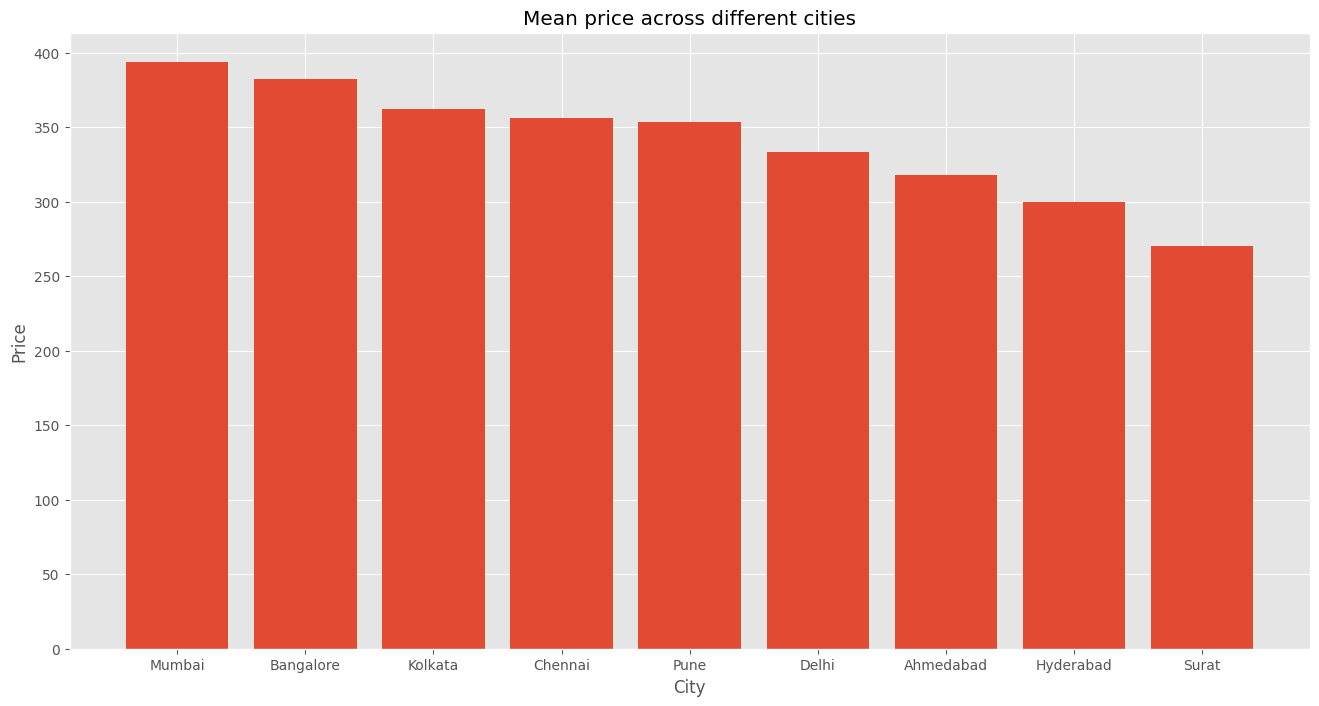

In [23]:
plt.bar(mean_price_per_city.index,mean_price_per_city.values)
plt.xlabel("City")
plt.ylabel("Price")
plt.title("Mean price across different cities")
plt.show()

# Bar graph reprsentation of prices across different cities

In [24]:
mean_deliver_time_per_city=df.groupby("City")["Delivery time"].mean()
mean_deliver_time_per_city=mean_deliver_time_per_city.sort_values(ascending=False)
mean_deliver_time_per_city

City
Kolkata      67.809807
Chennai      58.968354
Pune         55.854128
Delhi        50.734861
Bangalore    50.529598
Hyderabad    49.933023
Surat        48.484375
Mumbai       48.318716
Ahmedabad    44.709902
Name: Delivery time, dtype: float64

# Calculating the average time for deilvery in each city

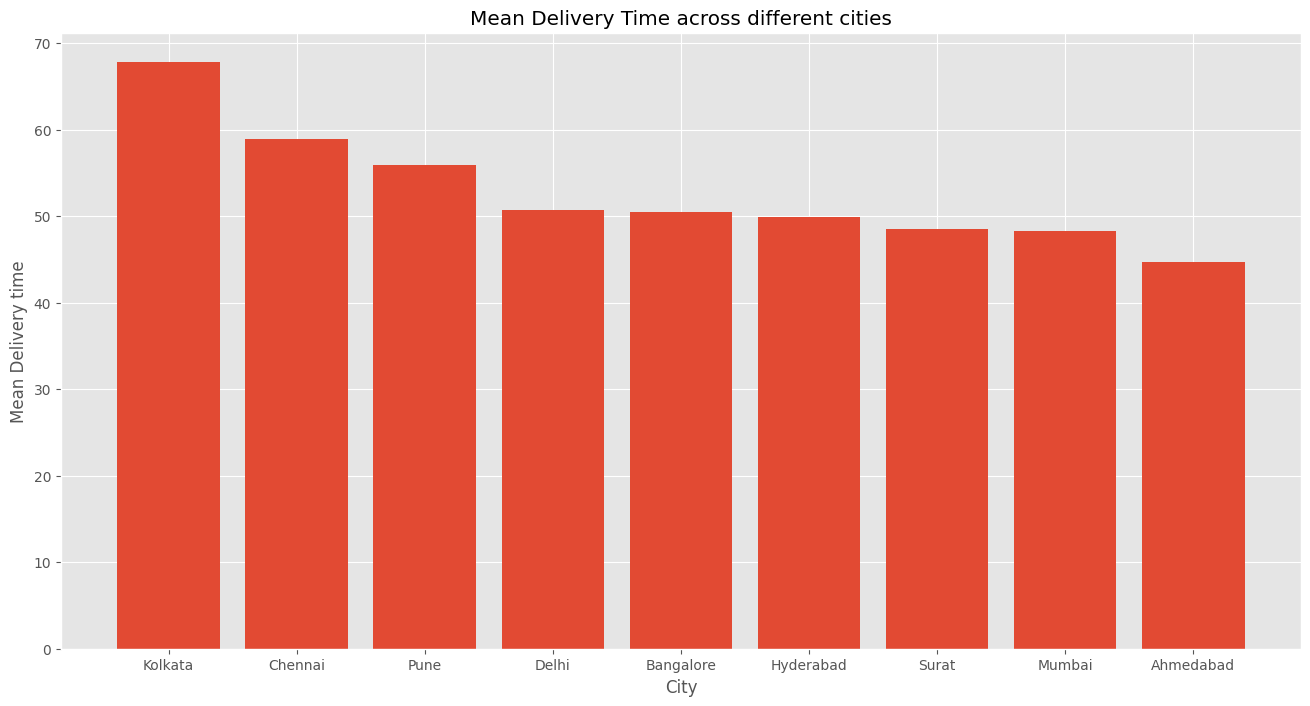

In [25]:
plt.bar(mean_deliver_time_per_city.index,mean_deliver_time_per_city.values)
plt.xlabel("City")
plt.ylabel("Mean Delivery time")
plt.title("Mean Delivery Time across different cities")
plt.show()

# Bar graph representation of avg delivery times across cities

In [26]:
average_deilver_time_per_area = df.groupby("Area")['Delivery time'].mean()
average_deilver_time_per_area = average_deilver_time_per_area.sort_values(ascending=False)
average_deilver_time_per_area

Area
Rabindrapally                 97.0
Santoshpur                    92.0
Haltu                         91.0
Tollygunge                    90.7
Smarpally Kestopur            90.0
                              ... 
Rajamohallah                  27.0
Chanchalguda                  27.0
Moonlight Cream Sagrampura    26.0
Ramkote                       26.0
Venkateshwara Colony          24.0
Name: Delivery time, Length: 833, dtype: float64

# Calculating the mean delivery time across areas given in the data frame

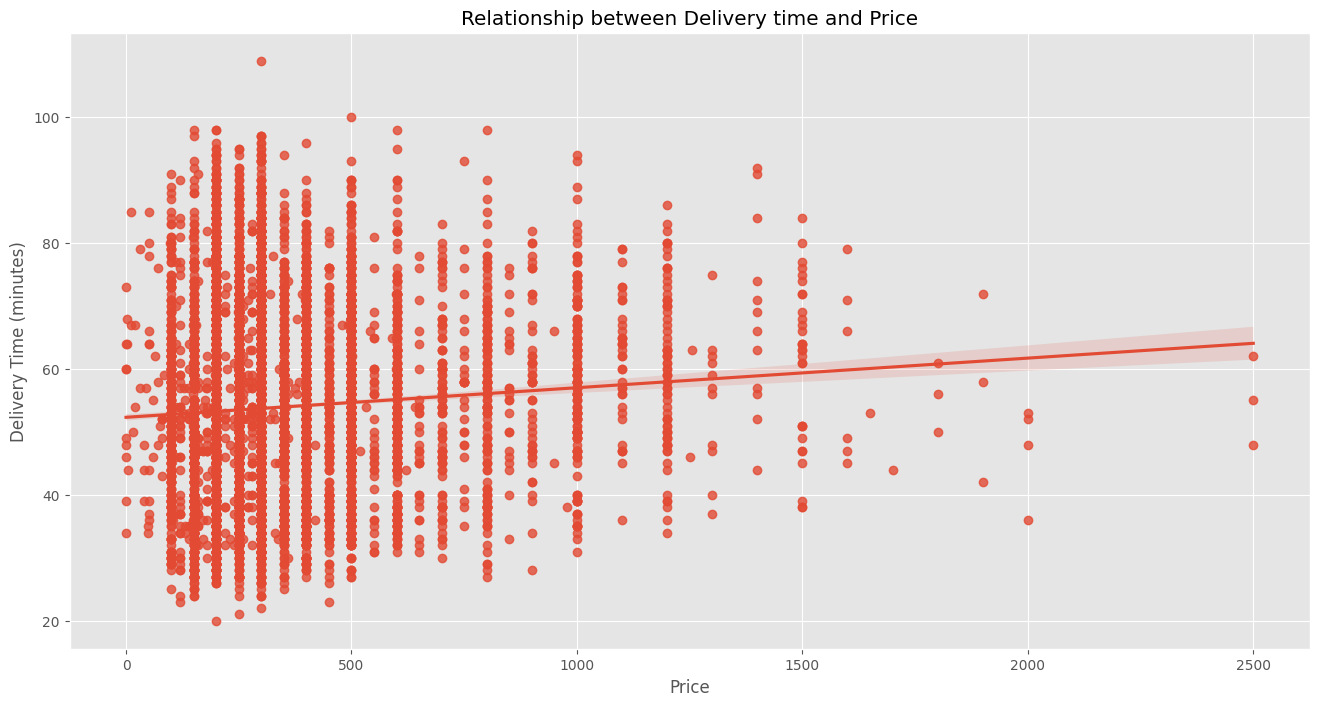

In [27]:
sns.regplot(x="Price", y="Delivery time", data=df)
plt.title("Relationship between Delivery time and Price")
plt.xlabel("Price")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# regplot for seeing the correaltion between Delivery time and Price

In [28]:
mean_ratings_per_city=df.groupby("City")["Avg ratings"].mean()
mean_ratings_per_city=mean_ratings_per_city.sort_values(ascending=False)
mean_ratings_per_city

City
Chennai      3.776311
Bangalore    3.762896
Hyderabad    3.701395
Kolkata      3.698811
Mumbai       3.599374
Ahmedabad    3.596513
Surat        3.580078
Pune         3.550183
Delhi        3.526350
Name: Avg ratings, dtype: float64

# Avg ratings across different cities

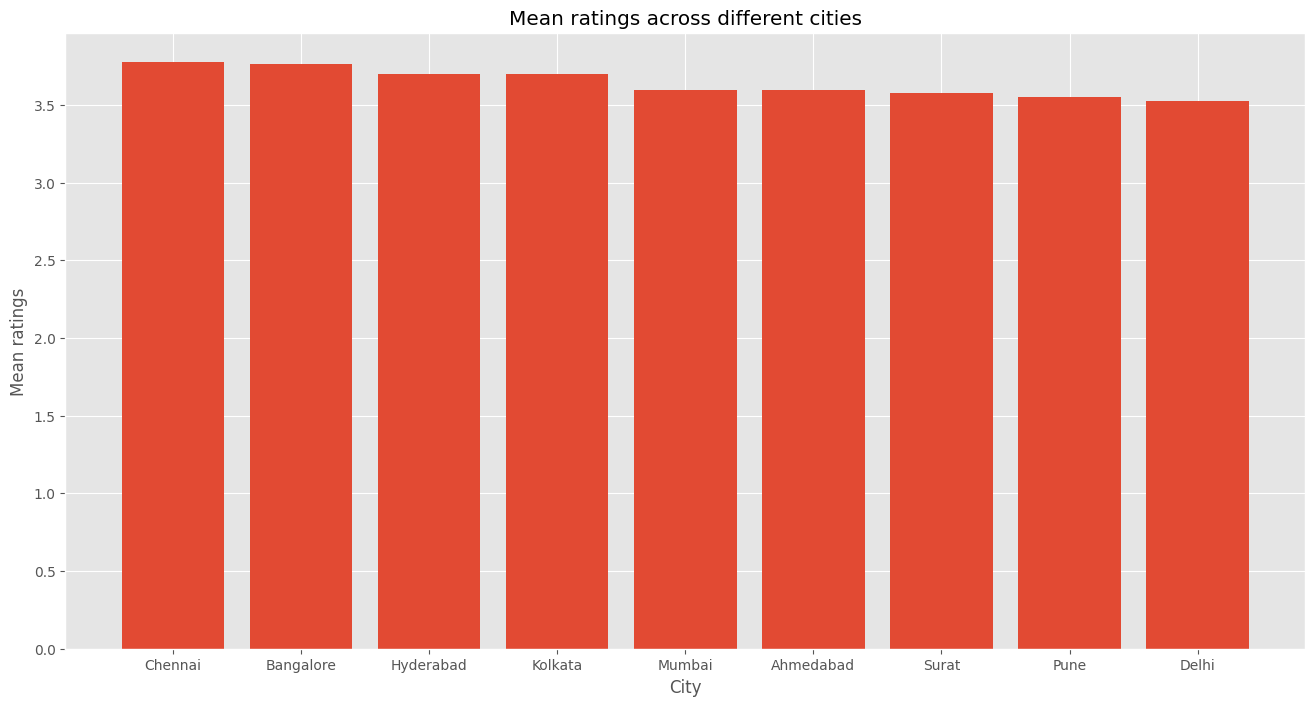

In [29]:
plt.bar(mean_ratings_per_city.index,mean_ratings_per_city.values)
plt.xlabel("City")
plt.ylabel("Mean ratings")
plt.title("Mean ratings across different cities")
plt.show()

# Graph bar representaion of avg ratings across different cities

In [30]:
Average_rating=df.sort_values(by=['Avg ratings'], ascending=False)
Average_rating

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
5425,427282,Chembur,Mumbai,The Asian Pavilion,200.0,5.0,20,Asian Chinese,Chembur,64
3894,357553,Bandra East,Mumbai,Diamond Market Pizza Jp,600.0,5.0,20,Italian,Scruz Bandra East,43
5800,442023,Himayath Nagar,Hyderabad,The Liege Waffles,300.0,5.0,20,Desserts Bakery,Himayath Nagar,45
8439,432094,Esplanade,Kolkata,Keventers Ice Creamery,300.0,5.0,20,"Ice Cream,Desserts",New Empire Cinema Kolkata,45
5799,442021,Himayath Nagar,Hyderabad,Splurge - Thickshakes And Milkshakes,300.0,5.0,20,Desserts Ice Cream Beverages,Himayath Nagar,45
...,...,...,...,...,...,...,...,...,...,...
3149,312035,Lake Town,Kolkata,Diwan Food Court,300.0,2.3,20,"Combo,North Indian",Lake Town,76
4953,405845,Kausar Baugh Nibm Road,Pune,Hyderabadi Biryani House,150.0,2.2,20,"Biryani,Thalis,Indian,Desserts",Undri,77
111,4783,Adikmet,Hyderabad,Frosty Den,200.0,2.2,20,"Ice Cream,Pizzas,Fast Food,Beverages,Desserts",O.U Road,43
5339,423285,Himayath Nagar,Hyderabad,The Shawarma Daddy,150.0,2.2,50,"Arabian,Continental,Snacks",Himayath Nagar,44


# Restraunts sorted by highest average ratings

In [31]:
total_rating=df.sort_values(by=['Total ratings'], ascending=False)
total_rating

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
90,4138,Koti,Hyderabad,Grand Hotel,300.0,4.1,10000,"Biryani,Tandoor,Chinese,Indian,Kebabs,Desserts",Abids Road,24
95,4320,Narayanguda,Hyderabad,Mehfil,300.0,3.9,10000,"Biryani,Tandoor,Chinese,Indian,Kebabs,Desserts",Narayanguda,25
1819,131870,Kavadiguda,Hyderabad,4M Biryani House,250.0,4.1,10000,"Biryani,North Indian,Chinese",Nallakunta & Vidyanagar,41
106,4650,New Nallakunta,Hyderabad,Bawarchi,300.0,3.9,10000,"Biryani,Tandoor,Chinese,Indian,Desserts,Kebabs...",Rtc X Roads,27
4069,367769,Chintal,Hyderabad,Lucky Restaurant,300.0,4.0,10000,"Biryani,Tandoor,Chinese,North Indian,Desserts,...",Banjara Hills,38
...,...,...,...,...,...,...,...,...,...,...
3437,332040,Bidhannagar,Kolkata,Binge Momos,300.0,3.8,20,"Chinese,Pan-Asian",Sector V Salt Lake,83
6878,46222,Kilpauk,Chennai,Prive Restaurant,1200.0,4.4,20,"Continental,North Indian",New 71 Ormes Road,48
6877,46125,Bidhannagar,Kolkata,Plush 28,1200.0,4.4,20,"Indian,Chinese,Oriental,Italian",Near Tank No.4,63
3439,332172,New Malakpet,Hyderabad,Grill Station,200.0,3.9,20,Indian,Kothapet & Dilsukhnagar,44


# Restarunts sorted by highest Total ratings

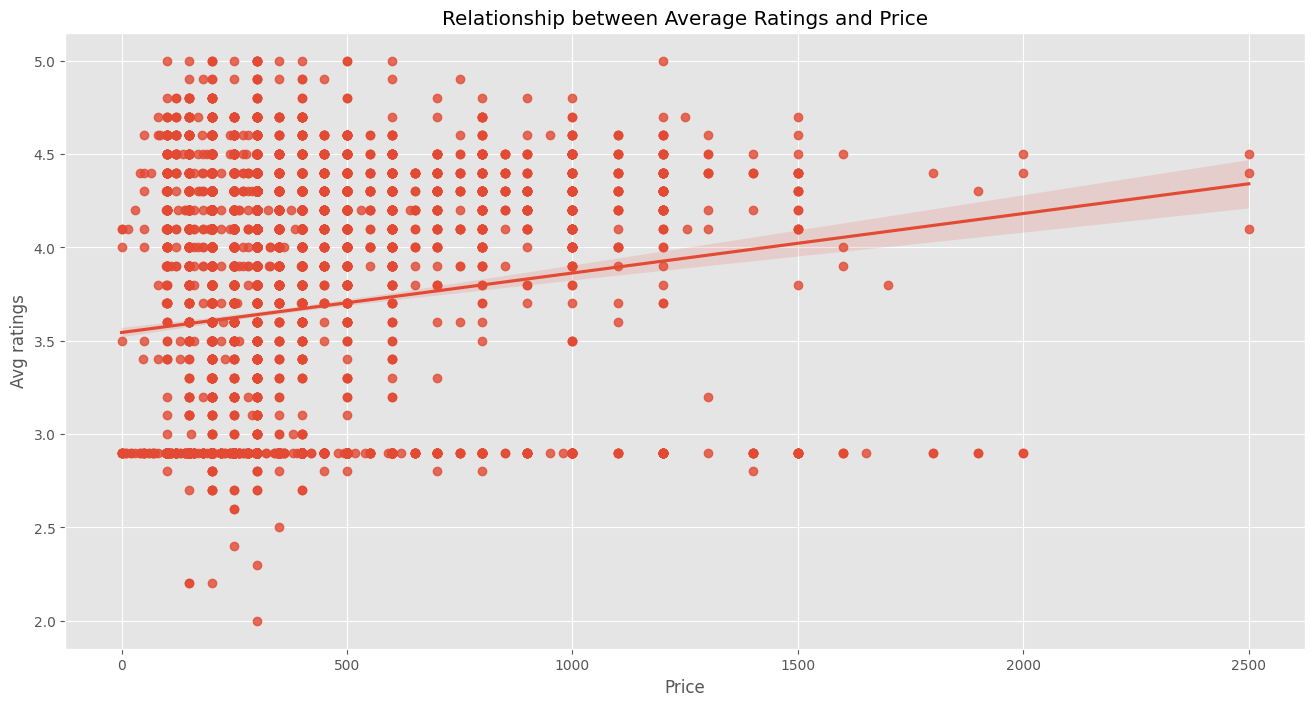

In [32]:
sns.regplot(y="Avg ratings", x="Price", data=df)
plt.title("Relationship between Average Ratings and Price")
plt.xlabel("Price")
plt.ylabel("Avg ratings")
plt.show()

# Regplot for correlation between avg ratings of restraunt and Price

In [33]:
cities = df['City'].unique()
cities

array(['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi',
       'Chennai', 'Ahmedabad', 'Surat'], dtype=object)

# Cities name

In [34]:
most_popular_cuisines = {}
for city in cities:
    city_df = df[df['City'] == city]
    cuisine_counts = city_df['Food type'].value_counts()
    most_popular_cuisine = cuisine_counts.index[0]
    most_popular_cuisines[city] = most_popular_cuisine
for city, most_popular_cuisine in most_popular_cuisines.items():
    print('The most popular cuisine in {} is {}'.format(city, most_popular_cuisine))

The most popular cuisine in Bangalore is South Indian
The most popular cuisine in Hyderabad is South Indian
The most popular cuisine in Mumbai is Chinese
The most popular cuisine in Pune is Chinese
The most popular cuisine in Kolkata is Indian
The most popular cuisine in Delhi is North Indian
The most popular cuisine in Chennai is Indian
The most popular cuisine in Ahmedabad is Indian
The most popular cuisine in Surat is Fast Food


# Calculating the most famous food type in the city

In [35]:
restaurant_types = df['Food type'].unique()
restaurant_types_and_prices_df = pd.DataFrame({'Restaurant type': restaurant_types,'Average meal price': df.groupby('Food type')['Price'].mean()})
restaurant_types_and_prices_df = restaurant_types_and_prices_df.sort_values(by='Average meal price', ascending=False)
restaurant_types_and_prices_df = restaurant_types_and_prices_df.reset_index()
print(restaurant_types_and_prices_df.head(5).to_string(index=True))


                                                    Food type                                    Restaurant type  Average meal price
0                                    Japanese,Korean,Barbecue             South Indian,Biryani,Seafood,Fast Food              2500.0
1  North Indian,Mughlai,Biryani,Grill,Seafood,Kebabs,Desserts  Pizzas,Fast Food,Chinese,Pastas,Biryani,Beverages              2500.0
2                                           Asian,Continental                            Mughlai,Chinese,Tandoor              2000.0
3                                  Healthy Food,Salads,Pizzas            Hyderabadi,Tandoor,Kebabs,Grill,Biryani              1900.0
4                                             Goan,Portuguese                                  Cafe,Healthy Food              1800.0


# combinations of food types offered by restraunts sorted according to price

# through the data analysis we were able to see that the prices were highest in mumbai and lowest in surat

# Deilvey time was highest in Kolkata and lowest in Ahemdabad